In [124]:
import numpy as np
import pandas as pd
import os
from tqdm import trange
import matplotlib.pyplot as plt
%matplotlib inline

months = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [125]:
data_set = 'Irish_2010'

path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir))

attr = pd.read_csv(os.path.join(path, 'data', f'{data_set}_attr_final.csv'))
data = []
for i in trange(len(attr)):
    id = attr['ID'][i]
    df = pd.read_csv(os.path.join(path, 'data', f'{data_set}_monthly_interval', f'{id}.csv'), header = None).values
    data.append(df)
data = np.array(data)

100%|██████████| 918/918 [00:29<00:00, 30.45it/s]


In [131]:
month = 1
n_clusters = 2
method = 'hierarchical/euclidean'

path_cluster = os.path.join(path, 'result', data_set, 'clustering', 'interval', method, f'n_clusters_{n_clusters}.csv')
clusters = pd.read_csv(path_cluster, header=None)

series = data[:, (month-1)*2:month*2, :months[month-1]*24]

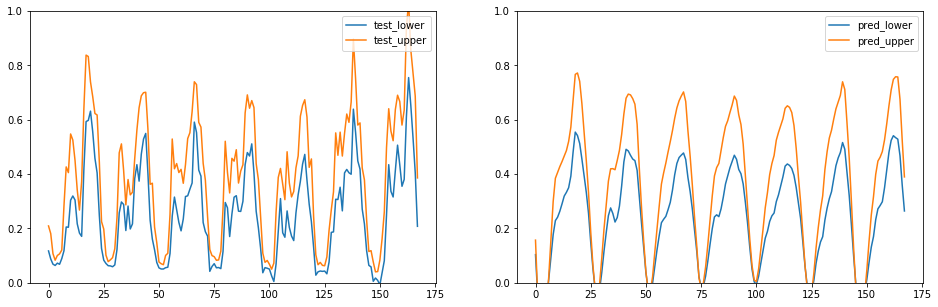

In [138]:
times = 1
algor = 'msvr'
i = 0

index = list(clusters[month-1] == i)
sub_series = series[index]
sub_series = np.sum(sub_series, axis=0)
test = sub_series[:, -168:]
train = sub_series[:, :-168]

scale = np.zeros(2)
scale[0] = np.max(train)
scale[1] = np.min(train)
train = (train - scale[1])/(scale[0] - scale[1])
test = (test - scale[1])/(scale[0] - scale[1])

path_result = os.path.join(path, 'result', data_set, 'forecasting', algor, f'times_{times}', method)

pred_series = np.load(os.path.join(path_result, f'n_clusters_{n_clusters}_month_{month}.npy'))

plt.figure(figsize=(16, 5))
p1 = plt.subplot(1, 2, 1)
p1.plot(test[0])
p1.plot(test[1])
plt.ylim((0, 1))
plt.legend(['test_lower', 'test_upper'], loc='upper right')

p2 = plt.subplot(1, 2, 2)
p2.plot(pred_series[i][0])
p2.plot(pred_series[i][1])
plt.ylim((0, 1))
plt.legend(['pred_lower', 'pred_upper'], loc='upper right')

In [139]:
np.mean(np.sum(((pred_series[i] - test)**2), axis=0))

0.019711207084049016